# Exploratory Data Analysis

We begin by importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib.lines as mlines
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from stargazer.stargazer import Stargazer
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestRegressor

Using TensorFlow backend.


Next we read in the dataset and save it under data.

In [2]:
data = pd.read_csv('data_preprocessed.csv')

We set the display option to show all rows and all columns of the dataset.

In [3]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

We can now beging with the actual exploratory data analysis.

Since our dependent variable is the log of per capita consumption, we can begin by creating a distribution for this.

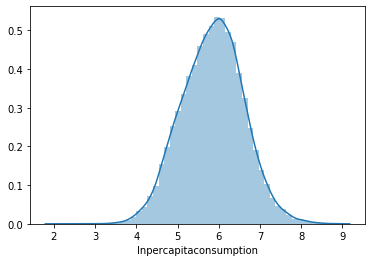

In [4]:
sns.distplot(data['lnpercapitaconsumption'])

We can get the correlation matrix.

In [5]:
data.corr()

,lnpercapitaconsumption,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_river,d_water_well,d_water_truck,d_water_pylon,d_water_outside,d_water_inside,d_drain_none,d_drain_river,d_drain_cesspool,d_drain_septic,d_drain_outside,d_drain_inside,d_wall_woodmat,d_wall_stonemud,d_wall_quincha,d_wall_tapia,d_wall_adobe,d_wall_stonecement,d_wall_brickcement,d_roof_straw,d_roof_mat,d_roof_platecane,d_roof_tile,d_roof_wood,d_roof_concrete,d_floor_earth,d_floor_cement,d_floor_wood,d_floor_tile,d_floor_sheets,d_floor_parquet,d_electricity,d_telephone,d_h_educ_none,d_h_educ_pre,d_h_educ_prim,d_h_educ_sec,d_h_educ_higher_nouni,d_h_educ_higher_uni,d_h_educ_post,d_max_educ_none,d_max_educ_prim,d_max_educ_sec,d_max_educ_higher_nouni,d_max_educ_higher_uni,d_insurance_1,d_insurance_2,d_insurance_3,d_insurance_4plus,d_crowd_1to2,d_crowd_2to4,d_crowd_4to6,d_crowd_6plus,d_lux_1,d_lux_2,d_lux_3,d_lux_4,d_lux_5
lnpercapitaconsumption,1.000000,-0.482110,0.004651,0.012586,0.570053,0.130712,0.099108,-0.401463,-0.090298,0.033674,-0.035518,0.073795,0.352273,-0.293166,-0.005475,-0.156825,-0.280734,0.071752,0.491527,-0.038290,-0.111595,-0.018283,-0.255520,-0.283825,0.016432,0.519380,-0.280476,0.007727,-0.129823,-0.227139,0.035497,0.461521,-0.549362,0.319215,-0.027137,0.263100,0.210028,0.208049,0.400916,0.428423,-0.225189,0.002416,-0.317448,0.109186,0.208156,0.297573,0.159252,-0.150587,-0.276757,-0.198091,0.154453,0.358506,0.132066,0.068052,0.041831,-0.261956,-0.006007,-0.234910,-0.155260,-0.146544,0.151286,0.227531,0.230430,0.230172,0.273938
d_fuel_wood,-0.482110,1.000000,-0.110225,-0.043973,-0.691963,-0.059303,-0.118306,0.370168,0.057884,-0.055491,-0.016539,-0.095704,-0.261573,0.204758,0.018324,0.130260,0.280060,-0.097525,-0.404584,0.109686,0.035961,0.016560,0.216998,0.217115,-0.019458,-0.448372,0.197770,-0.038107,0.070738,0.279106,-0.047542,-0.366465,0.425841,-0.342520,0.083322,-0.162157,-0.115503,-0.100178,-0.326618,-0.288212,0.133442,-0.001019,0.270950,-0.137661,-0.159035,-0.169239,-0.071427,0.074227,0.237377,0.119368,-0.144344,-0.234697,-0.064492,-0.029953,-0.023999,0.174463,-0.040394,0.104548,0.061750,0.097113,-0.159005,-0.192158,-0.164095,-0.141609,-0.129092
d_fuel_coal,0.004651,-0.110225,1.000000,-0.010658,-0.167716,-0.014374,-0.028675,-0.058532,-0.007749,0.032126,0.006419,-0.008620,0.024932,-0.004912,0.046617,0.035595,-0.040263,-0.010633,-0.001768,0.088292,-0.019587,0.018331,-0.038120,-0.036426,-0.012930,-0.014224,-0.020348,-0.010890,0.100229,-0.050346,-0.002311,-0.062212,0.002938,0.027272,0.001952,-0.030876,-0.024094,-0.020829,0.040163,-0.016350,-0.006014,-0.002872,0.023949,0.010244,-0.009412,-0.034699,-0.018927,-0.008890,-0.017843,0.042452,0.013392,-0.035565,-0.007274,-0.007498,0.007742,-0.000948,0.004763,0.033565,0.005834,0.003395,0.042518,0.002292,-0.019967,-0.029586,-0.030303
d_fuel_kerosene,0.012586,-0.043973,-0.010658,1.000000,-0.066908,-0.005734,-0.011439,-0.032225,-0.013598,-0.003313,0.000419,0.008014,0.026277,-0.006706,-0.009446,-0.018629,-0.017011,0.009458,0.029127,0.009048,-0.007814,-0.005675,-0.021819,-0.008661,0.046684,0.011454,-0.018309,0.023260,-0.000023,-0.019642,0.015920,0.010698,-0.007955,0.015221,-0.008863,-0.007365,0.000328,0.004037,0.010837,-0.002791,-0.006959,-0.001146,0.013374,0.003841,-0.006301,-0.012887,-0.007551,-0.008370,0.007783,0.005007,0.001079,-0.008637,0.016994,-0.003277,-0.004982,-0.034286,-0.015645,0.012823,-0.004776,-0.004168,0.000681,-0.006325,-0.006832,-0.007327,-0.012679
d_fuel_gas,0.570053,-0.691963,-0.167716,-0.066908,1.000000,-0.090234,-0.180012,-0.430780,-0.107582,0.042031,0.007057,0.100742,0.360705,-0.296893,-0.021146,-0.183289,-0.295245,0.102107,0.516374,-0.090874,-0.105037,-0.022594,-0.238950,-0.277188,0.009747,0.531163,-0.274892,0.035650,-0.123981,-0.246539,0.049752,0.447623,-0.548357,0.417247,-0.057141,0.209393,0.117525,0.122656,0.414869,0.388053,-0.201121,0.002059,-0.316149,0.171157,0.197118,0.206119,0.096633,-0.144516,-0.305485,-0.145585,0.184758,0.313237,0.01349

We can plot the correlation matrix. 

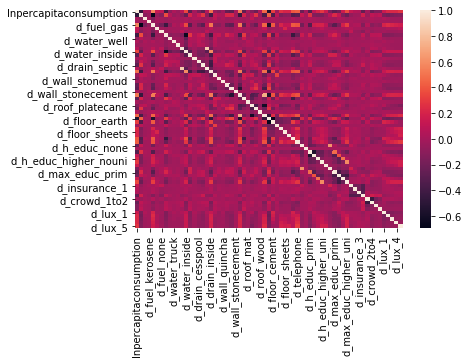

In [6]:
corr = data.corr()
sns.heatmap(corr)

We can get the correlations with lnpercapitaconsumption.

In [7]:
df = pd.DataFrame(data)
df[df.columns[0:]].corr()['lnpercapitaconsumption'][:]

lnpercapitaconsumption     1.000000
d_fuel_wood               -0.482110
d_fuel_coal                0.004651
d_fuel_kerosene            0.012586
d_fuel_gas                 0.570053
d_fuel_electric            0.130712
d_fuel_none                0.099108
d_water_river             -0.401463
d_water_well              -0.090298
d_water_truck              0.033674
d_water_pylon             -0.035518
d_water_outside            0.073795
d_water_inside             0.352273
d_drain_none              -0.293166
d_drain_river             -0.005475
d_drain_cesspool          -0.156825
d_drain_septic            -0.280734
d_drain_outside            0.071752
d_drain_inside             0.491527
d_wall_woodmat            -0.038290
d_wall_stonemud           -0.111595
d_wall_quincha            -0.018283
d_wall_tapia              -0.255520
d_wall_adobe              -0.283825
d_wall_stonecement         0.016432
d_wall_brickcement         0.519380
d_roof_straw              -0.280476
d_roof_mat                 0

We can sort the correlations with lnpercapitaconsumption.

In [8]:
sorted(df[df.columns[0:]].corr()['lnpercapitaconsumption'][:])

[-0.5493624881994932,
 -0.48211026973037296,
 -0.4014630547320286,
 -0.3174481947485996,
 -0.2931659162640586,
 -0.2838251372874542,
 -0.2807340803918526,
 -0.28047598975644356,
 -0.27675650381778766,
 -0.26195587077337035,
 -0.25552044596435486,
 -0.23490979456163213,
 -0.22713874287340344,
 -0.2251888066142815,
 -0.19809149547766094,
 -0.15682471738963846,
 -0.1552600011143663,
 -0.1505869199804394,
 -0.14654434188476217,
 -0.1298233486679001,
 -0.1115953703089365,
 -0.09029773820581241,
 -0.03828991500633265,
 -0.03551763381552485,
 -0.027137295690252413,
 -0.018283085298995586,
 -0.006006950957582874,
 -0.005475274425439625,
 0.002416023726836321,
 0.004650993528610221,
 0.007727088795398082,
 0.012585544872148038,
 0.016431852354689826,
 0.03367352889498392,
 0.03549705811305396,
 0.04183092204946862,
 0.06805151887833993,
 0.07175214587213907,
 0.07379494559937677,
 0.099108175208857,
 0.10918564837951526,
 0.13071241676273315,
 0.13206626626060422,
 0.15128638957524077,
 0.15445

We can get the top absolute correlations.

In [9]:
df = data
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 30))

Top Absolute Correlations
d_water_outside         d_drain_outside            0.860576
d_wall_brickcement      d_roof_concrete            0.726183
d_fuel_wood             d_fuel_gas                 0.691963
d_floor_earth           d_floor_cement             0.665379
d_water_river           d_water_inside             0.643252
d_h_educ_none           d_max_educ_none            0.626277
d_roof_platecane        d_roof_concrete            0.609673
d_water_inside          d_drain_inside             0.594257
d_h_educ_higher_uni     d_max_educ_higher_uni      0.591400
lnpercapitaconsumption  d_fuel_gas                 0.570053
d_h_educ_prim           d_h_educ_sec               0.556268
d_wall_brickcement      d_floor_earth              0.550030
lnpercapitaconsumption  d_floor_earth              0.549362
d_fuel_gas              d_floor_earth              0.548357
                        d_wall_brickcement         0.531163
d_drain_inside          d_wall_brickcement         0.530964
d_wall_adobe  